# Importing necessary libs

In [1]:
import os
import cv2 as cv
import pandas as pd
from collections import Counter
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 13.8 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.2 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO, RTDETR

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Visualizing the dataset

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WQEmHEmB1plDY0RMiGvs")
project = rf.workspace("ok-rtgeg").project("dataset_moidaden")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset_moidaden-1 in yolov11:: 100%|██████████| 7618/7618 [00:01<00:00, 6449.98it/s]



Số lượng ảnh trong tập train:  2364
Số lượng nhãn trong tập train: 
'cấm': 2510 nhãn
'nguy hiểm': 881 nhãn
'hiệu lệnh': 241 nhãn
'chỉ dẫn': 150 nhãn
'phụ': 54 nhãn


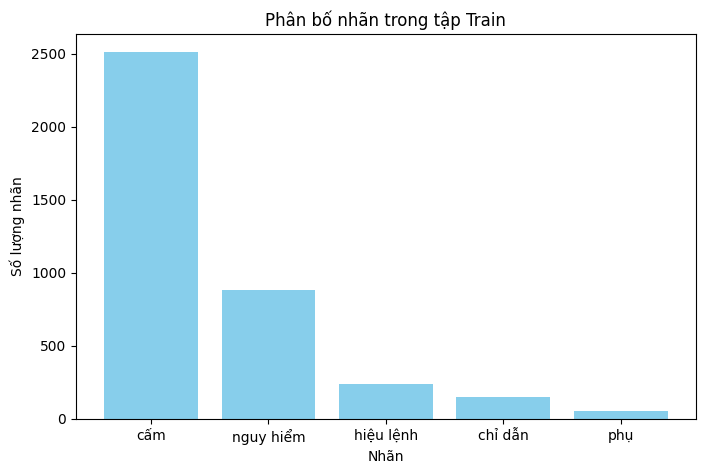


Số lượng ảnh trong tập valid:  799
Số lượng nhãn trong tập valid: 
'nguy hiểm': 326 nhãn
'cấm': 807 nhãn
'hiệu lệnh': 77 nhãn
'chỉ dẫn': 40 nhãn
'phụ': 19 nhãn


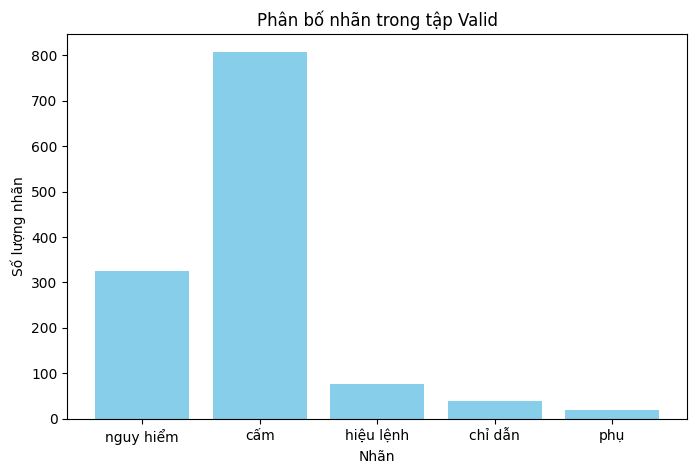


Số lượng ảnh trong tập test:  640
Số lượng nhãn trong tập test: 
'nguy hiểm': 240 nhãn
'cấm': 640 nhãn
'hiệu lệnh': 78 nhãn
'chỉ dẫn': 49 nhãn
'phụ': 18 nhãn


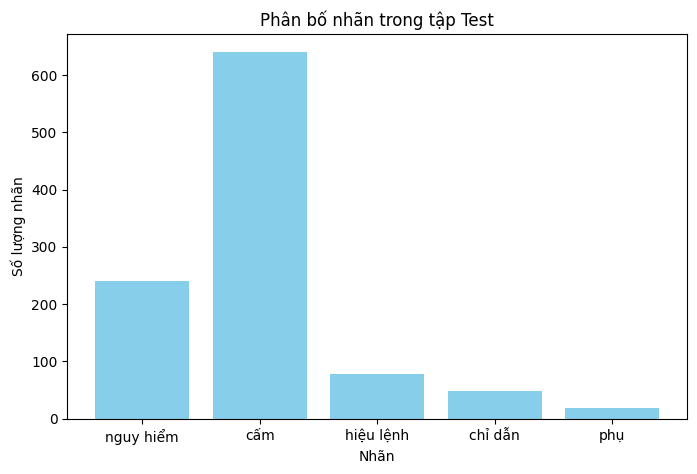

In [11]:
pathfile = '/kaggle/working/dataset_moidaden-1'
splits = ["train", "valid", "test"]
label_counts = {}

for split in splits:
    label_path = os.path.join(pathfile, split, 'labels')

    if not os.path.exists(label_path):
        print(f"No labels found for {split} split.")
        continue

    label_counter = Counter()
    
    for file in os.listdir(label_path):
        with open(os.path.join(label_path, file), "r") as f:
            for line in f:
                class_id = line.split()[0]
                label_counter[class_id] += 1

    label_counts[split] = label_counter

for split, counter in label_counts.items():
    label_list = []
    value_list = []
    print(f"\nSố lượng ảnh trong tập {split}: ", len(os.listdir(os.path.join(pathfile, split, 'labels'))))
    print(f"Số lượng nhãn trong tập {split}: ")
    for label, count in counter.items():
        name = 'cấm' if label == '0' else ('chỉ dẫn' if label == '1' else ('hiệu lệnh' if label == '2' else ('nguy hiểm' if label == '3' else 'phụ')))
        print(f"'{name}': {count} nhãn")

        label_list.append(name)
        value_list.append(count)

    plt.figure(figsize=(8, 5))
    plt.bar(label_list, value_list, color="skyblue")
    plt.title(f"Phân bố nhãn trong tập {split.capitalize()}")
    plt.xlabel("Nhãn")
    plt.ylabel("Số lượng nhãn")
    plt.show()

# Training models (YOLOv11, RT-DETR, YOLOv8)

In [28]:
yolov11 = YOLO("yolo11l.pt")
result_yv11 = yolov11.train(data='/kaggle/working/dataset_moidaden-1/data.yaml', epochs=200, imgsz=320)

100%|██████████| 49.0M/49.0M [00:00<00:00, 126MB/s] 


Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/kaggle/working/dataset_moidaden-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr


KeyboardInterrupt



In [ ]:
detr = RTDETR("rtdetr-l.pt")
result_d = detr.train(data='/kaggle/working/dataset_moidaden-1/data.yaml',epochs=200, imgsz=320)

In [ ]:
yolov8 = YOLO('yolov8l.pt')
result_yv8 = yolov8.train(data='/kaggle/working/dataset_moidaden-1/data.yaml',epochs=200, imgsz=320)

## Having fun testing the result

In [ ]:
# pred = yolov11.predict('/kaggle/input/difficulty/real_test/angled_2.jpg', show_labels=True, save=True, imgsz=320, conf=0.5)
# for r in pred:
#     r.show()

# Save & Load the trained models, evaluation time!!!

In [ ]:
yolov11.save('yolov11l_best.pt')
detr.save('detr-l_best.pt')
yolov8.save('yolov8l_best.pt')

In [6]:
yolov8_best = YOLO('/kaggle/input/yolov8l-best/yolov8l_best.pt')
yolov11_best = YOLO('/kaggle/input/yolov11-best/yolov11l_best.pt')
detr_best = RTDETR('/kaggle/input/best-model/detr-l_best.pt')

In [7]:
metrics = yolov8_best.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (AMD EPYC 7B12)
Model summary (fused): 268 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.58MB/s]
val: Scanning /kaggle/working/dataset_moidaden-1/valid/labels... 799 images, 173 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<00:00, 1176.52it/s]

val: New cache created: /kaggle/working/dataset_moidaden-1/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [05:46<00:00,  6.92s/it]


                   all        799       1269      0.863       0.81      0.857      0.704
                   cam        442        807       0.91      0.865      0.919       0.77
               chi_dan         40         40      0.674      0.621      0.691      0.579
             hieu_lenh         76         77      0.926      0.701      0.755      0.637
             nguy_hiem        238        326      0.948      0.914      0.956      0.768
                   phu         19         19      0.857      0.947      0.962      0.765
Speed: 0.2ms preprocess, 429.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val


array([    0.76986,     0.57925,     0.63708,     0.76761,     0.76514])

In [15]:
metrics = detr_best.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
rt-detr-l summary: 502 layers, 31,994,015 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /kaggle/working/dataset_moidaden-1/valid/labels.cache... 799 images, 173 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [07:05<00:00,  8.52s/it]


                   all        799       1269      0.881      0.858      0.908      0.716
                   cam        442        807      0.909      0.901      0.937      0.766
               chi_dan         40         40      0.803        0.6      0.768      0.563
             hieu_lenh         76         77      0.954      0.809      0.888      0.682
             nguy_hiem        238        326      0.927      0.979      0.969      0.778
                   phu         19         19       0.81          1      0.976       0.79
Speed: 0.3ms preprocess, 525.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val2


array([     0.7655,     0.56335,     0.68152,       0.778,     0.79046])

In [8]:
metrics = yolov11_best.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75

Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]
val: Scanning /kaggle/working/dataset_moidaden-1/valid/labels... 799 images, 173 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<00:00, 898.44it/s]


val: New cache created: /kaggle/working/dataset_moidaden-1/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [04:37<00:00,  5.55s/it]


                   all        799       1269       0.88      0.816      0.873      0.715
                   cam        442        807      0.928      0.851      0.924      0.773
               chi_dan         40         40      0.698      0.625      0.706      0.584
             hieu_lenh         76         77      0.964      0.704      0.813      0.664
             nguy_hiem        238        326      0.951      0.897      0.948      0.768
                   phu         19         19      0.859          1      0.977      0.785
Speed: 0.3ms preprocess, 341.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val2


0.8303545893932942